In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
real_df = pd.read_csv(r"C:\Users\gitan\Downloads\Real.csv")
fake_df = pd.read_csv(r"C:\Users\gitan\Downloads\Fake.csv")


In [3]:
real_df["label"] = "REAL"
fake_df["label"] = "FAKE"

In [ ]:
df = pd.concat([real_df, fake_df], axis=0).reset_index(drop=True)

In [5]:
df.dropna(inplace=True)
df = df[["text", "label"]]  # Keep only useful columns


In [6]:
print("Label distribution:\n", df["label"].value_counts())


Label distribution:
 label
FAKE    23481
REAL    21417
Name: count, dtype: int64


C:\Users\gitan\AppData\Local\Temp\ipykernel_6116\581414515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


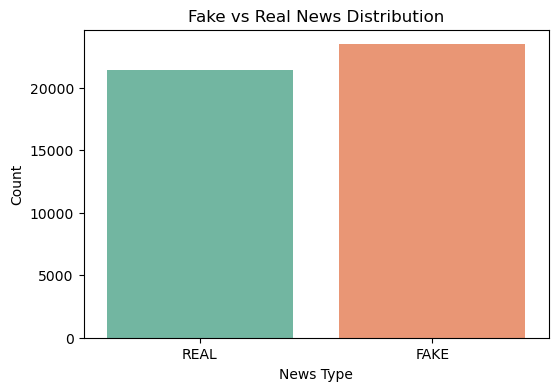

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Fake vs Real News Distribution")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()


In [8]:
X = df['text']
y = df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [11]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [12]:
y_pred = model.predict(tfidf_test)

In [13]:
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))


✅ Accuracy Score: 0.9947661469933184


In [14]:
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Confusion Matrix:
 [[4623   27]
 [  20 4310]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


📋 Classification Report:
               precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99      4650
        REAL       0.99      1.00      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



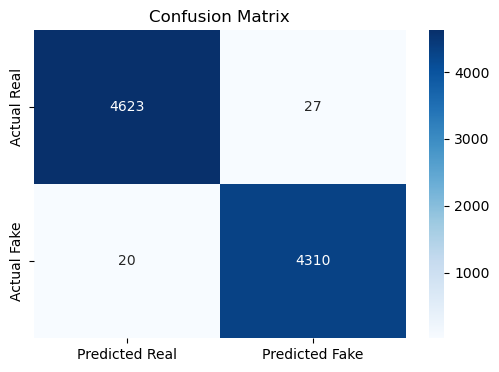

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Real', 'Predicted Fake'],
            yticklabels=['Actual Real', 'Actual Fake'])
plt.title("Confusion Matrix")
plt.show()

In [18]:
print(df.columns)  # Make sure 'text' and 'label' exist
print(df.head())

Index(['text', 'label'], dtype='object')
                                                text label
0  WASHINGTON (Reuters) - The head of a conservat...  REAL
1  WASHINGTON (Reuters) - Transgender people will...  REAL
2  WASHINGTON (Reuters) - The special counsel inv...  REAL
3  WASHINGTON (Reuters) - Trump campaign adviser ...  REAL
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  REAL


In [19]:
df = pd.concat([fake_df, real_df], axis=0)
df = df[['text', 'label']]  # We only need 'text' and 'label' columns
df.dropna(inplace=True)  

In [20]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [22]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [23]:
y_pred = model.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [24]:
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print("📊 Confusion Matrix:")
print(conf_matrix)

✅ Accuracy: 99.47%
📊 Confusion Matrix:
[[4710   23]
 [  25 4222]]


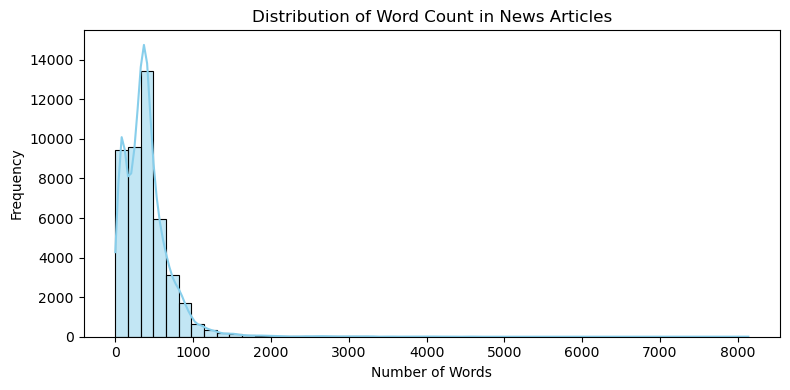

In [25]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 4))
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Word Count in News Articles")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\gitan\AppData\Local\Temp\ipykernel_6116\350382032.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Reds_r')


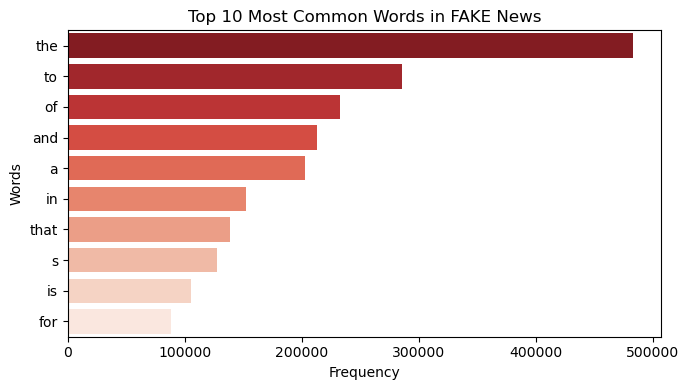

In [ ]:
from collections import Counter
fake_words = ' '.join(df[df['label'] == 'FAKE']['text']).split()
common_words = Counter(fake_words).most_common(10)
words, counts = zip(*common_words)
plt.figure(figsize=(7, 4))
sns.barplot(x=list(counts), y=list(words), palette='Reds_r')
plt.title("Top 10 Most Common Words in FAKE News")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


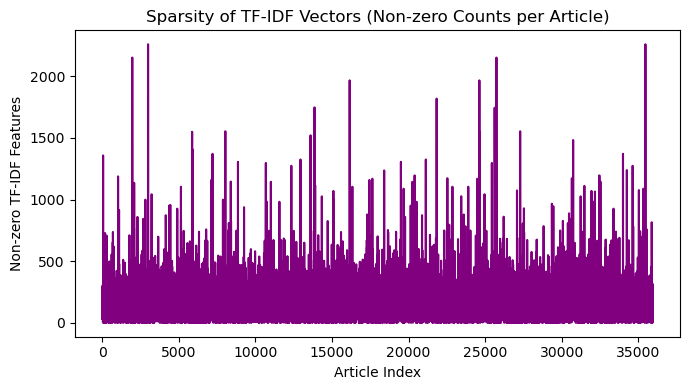

In [27]:
nonzeros = tfidf_train.getnnz(axis=1)

plt.figure(figsize=(7, 4))
plt.plot(nonzeros, color='purple')
plt.title("Sparsity of TF-IDF Vectors (Non-zero Counts per Article)")
plt.xlabel("Article Index")
plt.ylabel("Non-zero TF-IDF Features")
plt.tight_layout()
plt.show()


C:\Users\gitan\AppData\Local\Temp\ipykernel_6116\375618192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=df, palette='coolwarm')


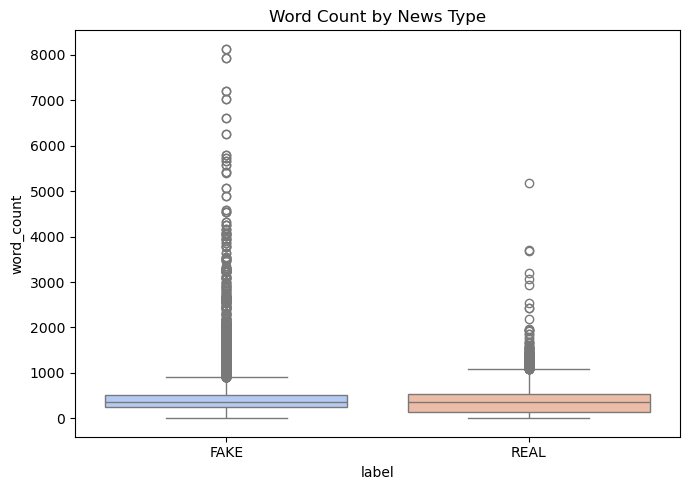

In [28]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='label', y='word_count', data=df, palette='coolwarm')
plt.title("Word Count by News Type")
plt.tight_layout()
plt.show()


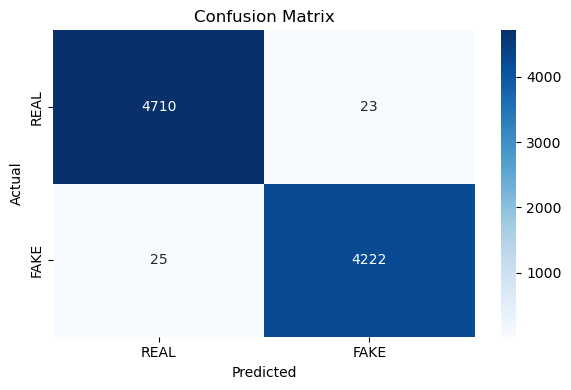

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['REAL', 'FAKE'],
            yticklabels=['REAL', 'FAKE'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


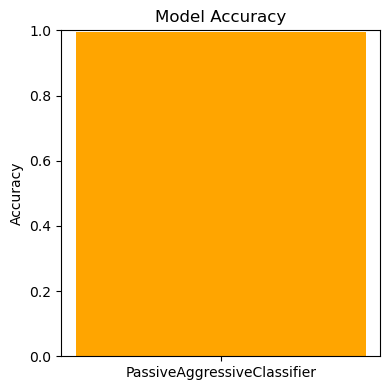

In [30]:
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(4, 4))
plt.bar(['PassiveAggressiveClassifier'], [accuracy], color='orange')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.tight_layout()
plt.show()


C:\Users\gitan\AppData\Local\Temp\ipykernel_6116\4230920953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Greens_r')


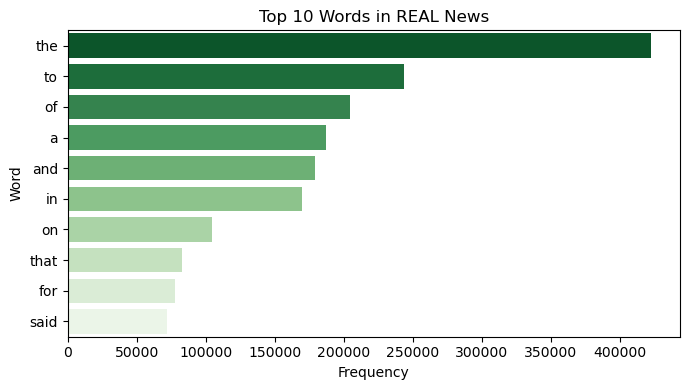

In [31]:
real_words = ' '.join(df[df['label'] == 'REAL']['text']).split()
common_real = Counter(real_words).most_common(10)
words, counts = zip(*common_real)

plt.figure(figsize=(7, 4))
sns.barplot(x=list(counts), y=list(words), palette='Greens_r')
plt.title("Top 10 Words in REAL News")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [32]:
if 'title' in df.columns:
    df['title_len'] = df['title'].apply(lambda x: len(str(x)))
    plt.figure(figsize=(7, 4))
    sns.histplot(df['title_len'], bins=40, kde=True, color='darkgreen')
    plt.title("Distribution of Title Length")
    plt.xlabel("Title Length (Characters)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


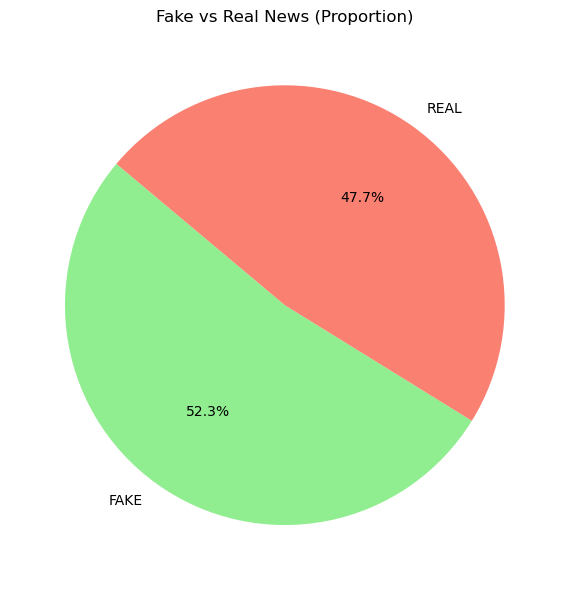

In [ ]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title("Fake vs Real News (Proportion)")
plt.tight_layout()
plt.show()

In [34]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df_by_date = df.groupby(df['date'].dt.date)['label'].value_counts().unstack().fillna(0)

    plt.figure(figsize=(10, 5))
    df_by_date.plot(kind='line', figsize=(10, 5))
    plt.title("News Article Count by Date")
    plt.xlabel("Date")
    plt.ylabel("Number of Articles")
    plt.tight_layout()
    plt.show()


c:\Users\gitan\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\gitan\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


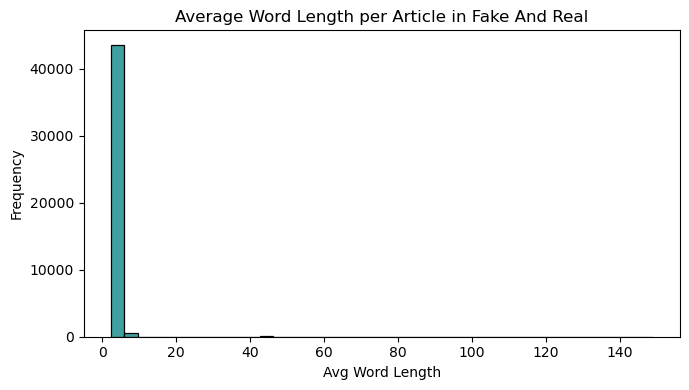

In [ ]:
df['avg_word_len'] = df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
plt.figure(figsize=(7, 4))
sns.histplot(df['avg_word_len'], bins=40, color='teal')
plt.title("Average Word Length per Article in Fake And Real")
plt.xlabel("Avg Word Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

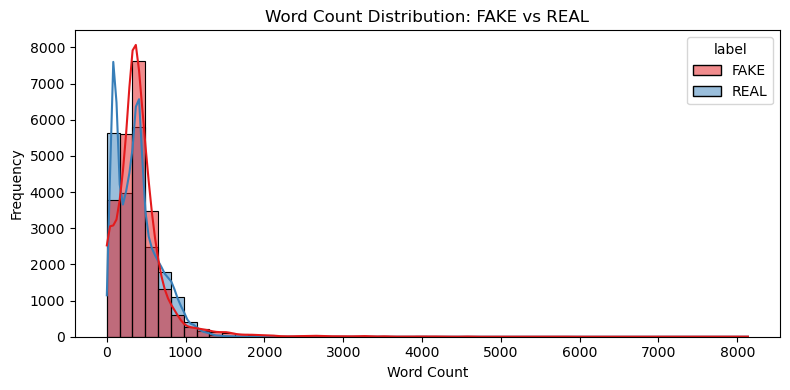

In [36]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, palette='Set1')
plt.title("Word Count Distribution: FAKE vs REAL")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x='date', hue='label', bins=50, palette='Dark2')
    plt.title("Article Count Over Time: FAKE vs REAL")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

C:\Users\gitan\AppData\Local\Temp\ipykernel_6116\2465861709.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(fake_counts), y=list(fake_words), ax=axes[0], palette='Reds_r')
C:\Users\gitan\AppData\Local\Temp\ipykernel_6116\2465861709.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(real_counts), y=list(real_words), ax=axes[1], palette='Greens_r')


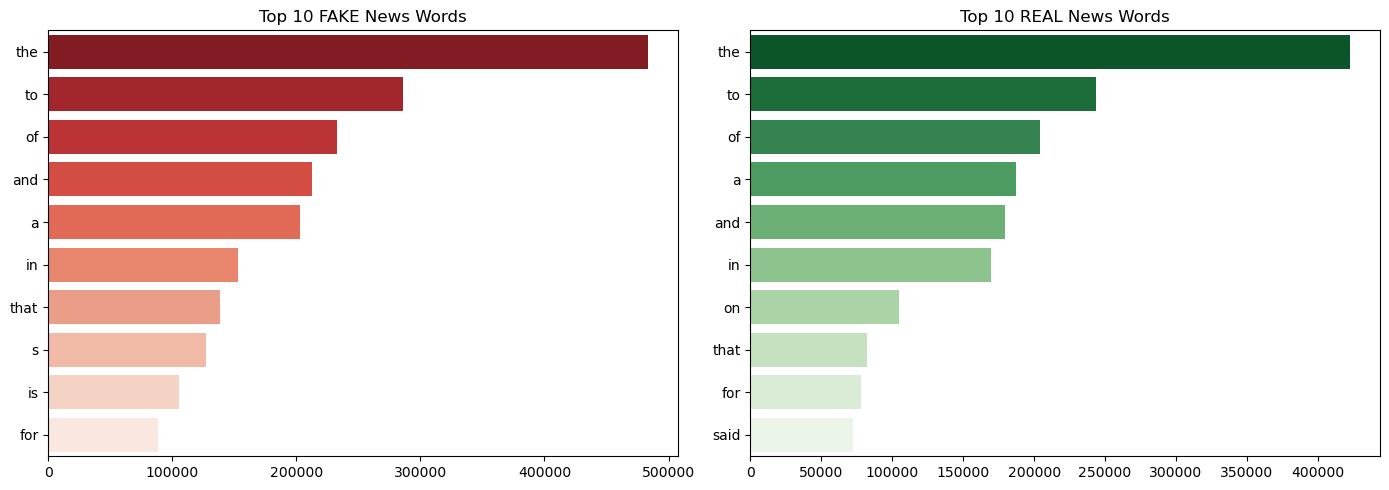

In [38]:
from collections import Counter

# Get top 10 words for each class
fake_words = ' '.join(df[df['label'] == 'FAKE']['text']).split()
real_words = ' '.join(df[df['label'] == 'REAL']['text']).split()

fake_common = Counter(fake_words).most_common(10)
real_common = Counter(real_words).most_common(10)

fake_words, fake_counts = zip(*fake_common)
real_words, real_counts = zip(*real_common)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=list(fake_counts), y=list(fake_words), ax=axes[0], palette='Reds_r')
axes[0].set_title("Top 10 FAKE News Words")

sns.barplot(x=list(real_counts), y=list(real_words), ax=axes[1], palette='Greens_r')
axes[1].set_title("Top 10 REAL News Words")

plt.tight_layout()
plt.show()
